In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df=pd.read_excel(r"C:\Users\MY BOOK\OneDrive\Documents\Data analytics\padhai\ameo 2015.xlsx")

In [9]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
df.shape

(3998, 38)

In [10]:
# Checking the data types of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [12]:
# Looking for missing values
df.isnull().sum().sum()

0

In [ ]:
#Checking whether there is a gender bias on salary

In [13]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

In [23]:
#sns.violinplot(x='Gender', y='Salary', data=df)

In [4]:
# Gender wise academic performance .
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [5]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [6]:
# Females seems to be performing better than males in all levels of education. 

# Now we proceed to check their difference in personality test.

In [7]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [8]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [9]:
# Females outperform males in personality traits

Text(0.5, 0.98, 'Salary levels by gender')

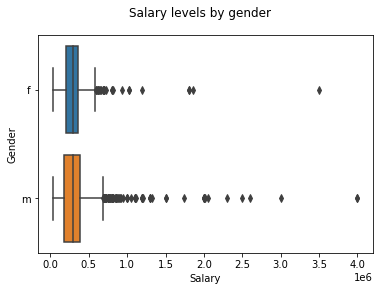

In [10]:
sns.boxplot(x='Salary', y = 'Gender', data=df)
plt.suptitle('Salary levels by gender')

In [49]:
# From the boxplot, observe that males have higher proportion of high earners. 

# To derive more information on how males and females differ in earning, we analyze further.

In [11]:
df[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [12]:
df[['Salary', 'Gender']].groupby('Gender').median()

,Salary
Gender,
f,300000
m,300000


In [32]:
# Mean salary of males are higher than that of females. Since they both have same median, its possible
# that means are affected by outliers. We proceed with analysis to check whether thats the case.

In [51]:
th = df['Salary'].mean() + df['Salary'].std()
df['HighIncome'] = (df.Salary > th)

# From the dataframe, we select those persons who are earning higher salaries. 

In [14]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome', 'Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [35]:
# Observe that both males and females are earning allmost the same in the lower income group.
# Contrary to what we have expected, in the high income group males are earning less than that of females on average.
# Digging further...

In [15]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome', 'Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [37]:
# Observe that a very low proportion of those in high income group are females. This implies that females are not 
# rising up well enough in their careers.

In [16]:
df.CollegeTier.unique()

array([2, 1], dtype=int64)

In [17]:
df[['CollegeTier', 'HighIncome', 'Salary']].groupby(['HighIncome', 'CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [18]:
print('Low income_college tier 2_percentage ', 3492/(3492+234)*100)
print('High income_college tier 2_percentage ', 209/(209+63)*100)

Low income_college tier 2_percentage  93.71980676328504
High income_college tier 2_percentage  76.83823529411765


In [19]:
# Observe that there is a reduction in tier 2 representation high income group
# Since the number of students graduating from tier 1 colleges are much less than that of those from tier 2,
# this means that tier 1 students are getting better salaries.

In [20]:
df[['Gender', 'CollegeTier', 'Salary']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [21]:
print('In college tier 1 female percentage is', 51/(246+51)*100)
print('In college tier 2 female percentage is', 906/(906+2795)*100)

In college tier 1 female percentage is 17.17171717171717
In college tier 2 female percentage is 24.479870305322883


In [45]:
# Females tend to enrol in tier 2 colleges more than that in tier 1 colleges. This could be a reason for their underperformance.  

In [22]:
# Now we proceed to analyse the salary distribution with resepect to degree

df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [23]:
df[['Salary', 'Degree', 'Gender']].groupby(['Degree','Gender']).count()

Salary
Degree        Gender        
B.Tech/B.E.   f          889
              m         2811
M.Sc. (Tech.) f            1
              m            1
M.Tech./M.E.  f            9
              m           44
MCA           f           58
              m          185

In [24]:
print('Percentage of females in B.Tech/B.E. is ', 889/(889+2811))
print('Percentage of females in  M.Tech./M.E. is ', 9/54 )
print('Percentage of females in MCA is ', 58/(58+185))

Percentage of females in B.Tech/B.E. is  0.24027027027027026
Percentage of females in  M.Tech./M.E. is  0.16666666666666666
Percentage of females in MCA is  0.23868312757201646


In [25]:
# There is only one person with MSc degree in this data set, so we neglect it in further analysis
# Observe that most of the candidates donot have post graduation.
# Proportion of females pursuing post graduation is lower compared to males

mask = df['Degree'] == 'M.Sc. (Tech.)'
df_filt = df[~mask]

In [26]:
df_filt[['Salary', 'Degree', 'Gender']].groupby(['Degree']).mean()

,Salary
Degree,
B.Tech/B.E.,308622.702703
M.Tech./M.E.,366132.075472
MCA,280802.469136


In [29]:
df_filt[['Salary', 'HighIncome', 'Degree']].groupby(['HighIncome',  'Degree']).count()

Salary
HighIncome Degree              
False      B.Tech/B.E.     3453
           M.Tech./M.E.      43
           MCA              228
True       B.Tech/B.E.      247
           M.Tech./M.E.      10
           MCA               15

In [30]:
print('proportion of high earners within BTech/BE group ', 247/(3453+247))
print('proportion of high earners within MTech/ME group ', 10/53)
print('proportion of high earners within MCA group ', 15/(228+15))

proportion of high earners within BTech/BE group  0.06675675675675675
proportion of high earners within MTech/ME group  0.18867924528301888
proportion of high earners within MCA group  0.06172839506172839


In [ ]:
# Observations
# Salary for MTech/ME graduates are highest among the three groups
# BTech/BE graduates are on an average earning more compared to MCA graduates.
# About 19% of MTech/ME graduates belong to the high income group, whereas its just about 6% in other groups

In [31]:
# Conclusion
# Encouraging women to join tier 1 colleges and to pursue masters may decrease the gender bias we see in the salary distribution.

In [54]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [55]:
cbse=['cbse','cbse[gulf zone]','central board of secondary education','central board of secondary education, new delhi','cbse board']
icse=['icse','icse board', 'icse board , new delhi']
isc=['council for indian school certificate examination','isc']
def boardcorrect10(x):
    if x in cbse:
        return 'cbse'
    elif x in icse:
        return 'icse'
    elif x in isc:
        return 'isc'
    else:
        return 'state'

In [56]:
df['10board']=df['10board'].apply(boardcorrect10)

In [57]:
df['10board'].unique()

array(['state', 'cbse', 'icse', 'isc'], dtype=object)

In [44]:
df['12board'].unique()


array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [58]:
cbse=['cbse','cbsc','cbese','cbse[gulf zone]','cbse,new delhi','central board of secondary education','central board of secondary education, new delhi','cbse board']
icse=['icse','icse board', 'icse board , new delhi']
isc=['council for indian school certificate examination','isc','isce','isc board']
def boardcorrect12(x):
    if x in cbse:
        return 'cbse'
    elif x in icse:
        return 'icse'
    elif x in isc:
        return 'isc'
    else:
        return 'state'

In [59]:
df['12board']=df['12board'].apply(boardcorrect12)

In [60]:
df['12board'].unique()

array(['state', 'cbse', 'isc', 'icse'], dtype=object)

<AxesSubplot:xlabel='10board', ylabel='count'>

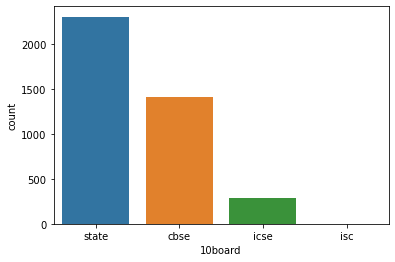

In [66]:
sns.countplot(x='10board', data=df)

In [68]:
df[df['10board']=='isc']


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
3404,512864,500000,2012-06-01,present,program manager,Gurgaon,m,1990-09-10,82.0,isc,...,-1,-1,-1,-1,0.7419,0.8128,-1.6502,-0.8778,-0.2875,False


In [69]:
# since there is only one candidate from isc, we filter it out

mask2 = df['10board']=='isc'
df_filt2 = df[~mask2]

<AxesSubplot:xlabel='10board', ylabel='Salary'>

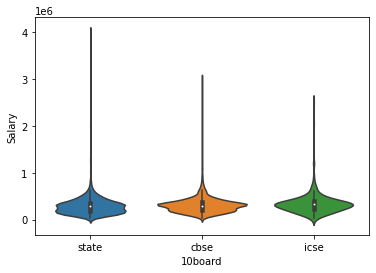

In [74]:
sns.violinplot(x='10board', y='Salary', data=df_filt2)

<AxesSubplot:xlabel='10board', ylabel='Salary'>

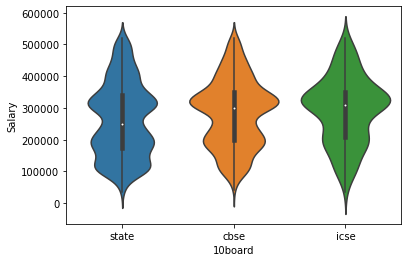

In [75]:
sns.violinplot(x='10board', y='Salary', data=df_filt2[df_filt2['HighIncome']==False])

<AxesSubplot:xlabel='12board', ylabel='count'>

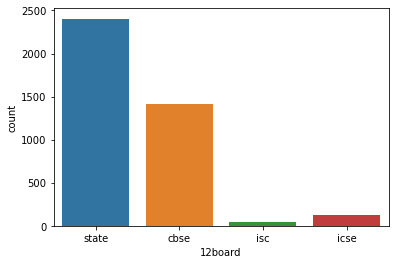

In [67]:
sns.countplot(x='12board', data=df)